## 1. Import required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

## 2. Import data from csv file

In [2]:
cars = pd.read_csv("carAuction.csv")

In [3]:
cars.describe()

,MMRCurrentAuctionAveragePrice,VehBCost,VehicleAge,VehOdo,WarrantyCost
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6116.216000,6720.207200,4.182900,71541.084100,1279.954000
std,2426.340132,1753.796382,1.714509,14688.317704,609.026443
min,0.000000,225.000000,1.000000,4825.000000,462.000000
25%,4255.000000,5435.000000,3.000000,61842.500000,834.000000
50%,6076.000000,6700.000000,4.000000,73506.500000,1169.000000
75%,7732.000000,7880.000000,5.000000,82462.500000,1623.000000
max,27543.000000,29795.000000,9.000000,109734.000000,5913.000000


#### Display head of the dataset

In [4]:
cars.head()

,Auction,Color,IsBadBuy,MMRCurrentAuctionAveragePrice,Size,TopThreeAmericanName,VehBCost,VehicleAge,VehOdo,WarrantyCost,WheelType
0,ADESA,WHITE,No,2871,LARGE TRUCK,FORD,5300,8,75419,869,Alloy
1,ADESA,GOLD,Yes,1840,VAN,FORD,3600,8,82944,2322,Alloy
2,ADESA,RED,No,8931,SMALL SUV,CHRYSLER,7500,4,57338,588,Alloy
3,ADESA,GOLD,No,8320,CROSSOVER,FORD,8500,5,55909,1169,Alloy
4,ADESA,GREY,No,11520,LARGE TRUCK,FORD,10100,5,86702,853,Alloy


## 3. Data preprocessing

#### Create dummy variables

In [5]:
#cars = pd.get_dummies(cars, columns=['Auction','Color','Size','TopThreeAmericanName','WheelType'],drop_first=True)
cars = pd.get_dummies(cars, columns=['Auction','Color','Size','TopThreeAmericanName','WheelType'])

In [6]:
cars.head()

,IsBadBuy,MMRCurrentAuctionAveragePrice,VehBCost,VehicleAge,VehOdo,WarrantyCost,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,Color_BEIGE,...,Size_SPORTS,Size_VAN,TopThreeAmericanName_CHRYSLER,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,WheelType_Alloy,WheelType_Covers,WheelType_Special,WheelType_unkwnWheel
0,No,2871,5300,8,75419,869,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,Yes,1840,3600,8,82944,2322,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2,No,8931,7500,4,57338,588,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,No,8320,8500,5,55909,1169,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,No,11520,10100,5,86702,853,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0


#### Convert to numpy array

In [7]:
carAuction = cars.iloc[:,:].values
print(carAuction.shape)

(10000, 45)


## 4. Decision tree model prediction

#### Partition the dataset for Decision Tree model

In [8]:
predictors = np.delete(carAuction, 0, axis=1)
target = carAuction[:,0]
print(predictors.shape, target)

predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, stratify=target, random_state=1)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(10000, 44) ['No' 'Yes' 'No' ... 'No' 'No' 'No']
(7000, 44) (3000, 44) (7000,) (3000,)


#### Build a decision tree model

In [9]:
model = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 3)
model.fit(predictors_train, target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

#### Plot the decision tree model

[Text(1255.5, 1426.95, 'WheelType_unkwnWheel <= 0.5\nentropy = 0.556\nsamples = 7000\nvalue = [6094, 906]\nclass = No'),
 Text(627.75, 1019.25, 'VehicleAge <= 4.5\nentropy = 0.467\nsamples = 6682\nvalue = [6018, 664]\nclass = No'),
 Text(313.875, 611.55, 'VehBCost <= 7432.5\nentropy = 0.342\nsamples = 4084\nvalue = [3824, 260]\nclass = No'),
 Text(156.9375, 203.8499999999999, 'entropy = 0.392\nsamples = 2460\nvalue = [2270, 190]\nclass = No'),
 Text(470.8125, 203.8499999999999, 'entropy = 0.256\nsamples = 1624\nvalue = [1554, 70]\nclass = No'),
 Text(941.625, 611.55, 'VehBCost <= 5827.5\nentropy = 0.623\nsamples = 2598\nvalue = [2194, 404]\nclass = No'),
 Text(784.6875, 203.8499999999999, 'entropy = 0.719\nsamples = 1295\nvalue = [1038, 257]\nclass = No'),
 Text(1098.5625, 203.8499999999999, 'entropy = 0.508\nsamples = 1303\nvalue = [1156, 147]\nclass = No'),
 Text(1883.25, 1019.25, 'Auction_MANHEIM <= 0.5\nentropy = 0.793\nsamples = 318\nvalue = [76, 242]\nclass = Yes'),
 Text(1569.37

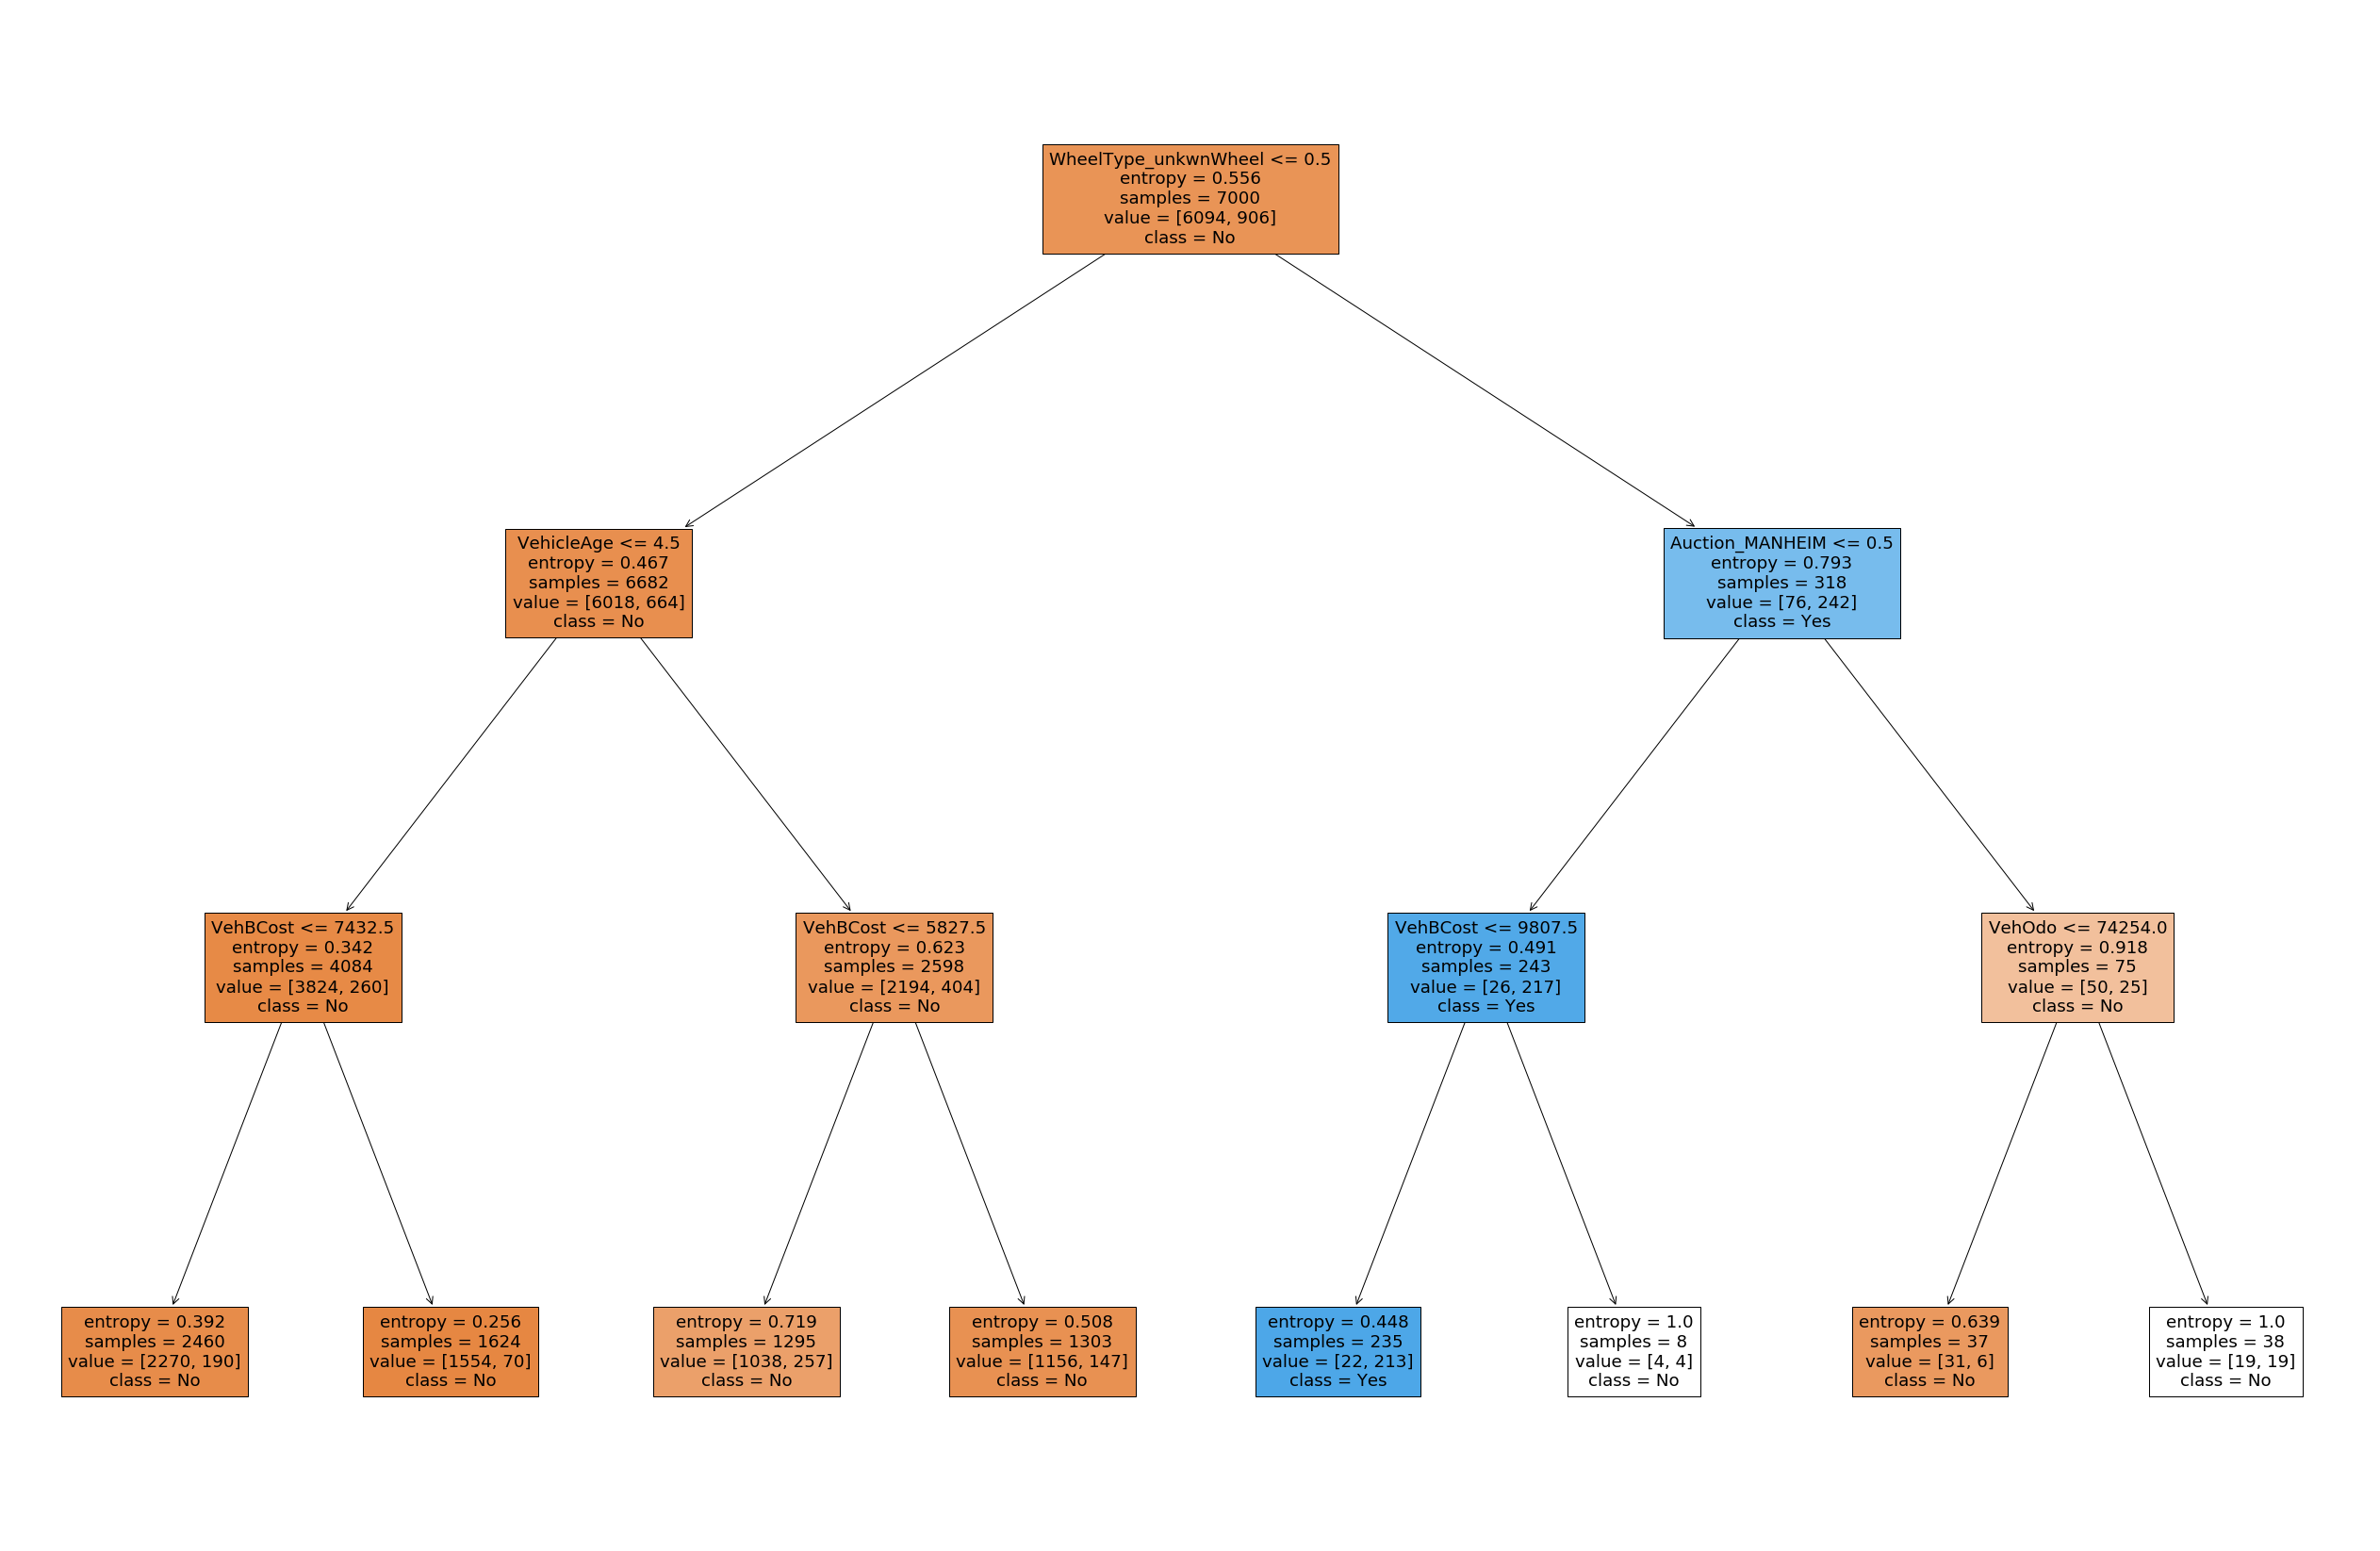

In [10]:
fig = plt.figure(figsize=(45,30))
tree.plot_tree(model, 
               feature_names=list(cars.columns)[1:],  
               class_names=['No','Yes'],
               filled=True)

In [11]:
print(tree.export_text(model, feature_names=list(cars.columns)[1:]))

|--- WheelType_unkwnWheel <= 0.50
|   |--- VehicleAge <= 4.50
|   |   |--- VehBCost <= 7432.50
|   |   |   |--- class: No
|   |   |--- VehBCost >  7432.50
|   |   |   |--- class: No
|   |--- VehicleAge >  4.50
|   |   |--- VehBCost <= 5827.50
|   |   |   |--- class: No
|   |   |--- VehBCost >  5827.50
|   |   |   |--- class: No
|--- WheelType_unkwnWheel >  0.50
|   |--- Auction_MANHEIM <= 0.50
|   |   |--- VehBCost <= 9807.50
|   |   |   |--- class: Yes
|   |   |--- VehBCost >  9807.50
|   |   |   |--- class: No
|   |--- Auction_MANHEIM >  0.50
|   |   |--- VehOdo <= 74254.00
|   |   |   |--- class: No
|   |   |--- VehOdo >  74254.00
|   |   |   |--- class: No



#### Make predictions on both training and testing sets

In [12]:
prediction_on_test = model.predict(predictors_test)
prediction_on_train = model.predict(predictors_train)

In [13]:
print(prediction_on_test.shape,prediction_on_test)
print(prediction_on_train.shape,prediction_on_train)

(3000,) ['No' 'No' 'No' ... 'No' 'No' 'No']
(7000,) ['No' 'No' 'No' ... 'No' 'No' 'No']


#### Generate confusion matrix and evaluation metrics on training and testing sets

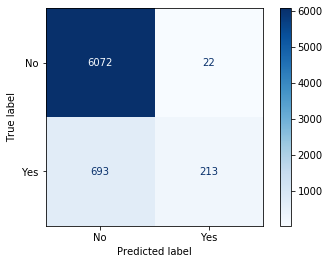

In [14]:
plot_confusion_matrix(model, predictors_train, target_train, cmap=plt.cm.Blues, values_format='d')

In [15]:
print(classification_report(target_train, prediction_on_train))

              precision    recall  f1-score   support

          No       0.90      1.00      0.94      6094
         Yes       0.91      0.24      0.37       906

    accuracy                           0.90      7000
   macro avg       0.90      0.62      0.66      7000
weighted avg       0.90      0.90      0.87      7000



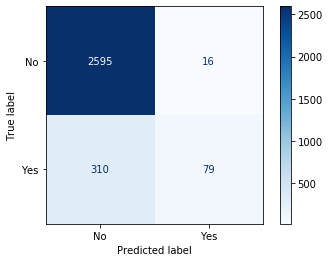

In [16]:
plot_confusion_matrix(model, predictors_test, target_test, cmap=plt.cm.Blues, values_format='d')

In [17]:
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.89      0.99      0.94      2611
         Yes       0.83      0.20      0.33       389

    accuracy                           0.89      3000
   macro avg       0.86      0.60      0.63      3000
weighted avg       0.89      0.89      0.86      3000

